In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from optimizr import mcmc_sample

np.random.seed(42)
print("OptimizR MCMC Module Loaded!")

OptimizR MCMC Module Loaded!


## Example 1: Inferring Parameters of a Normal Distribution

Given observed data $\{x_1, \ldots, x_n\}$, infer $\mu$ and $\sigma$.

### Likelihood
$$L(\mu, \sigma | \mathbf{x}) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$$

### Log-Likelihood
$$\log L(\mu, \sigma | \mathbf{x}) = -\frac{n}{2}\log(2\pi) - n\log(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2$$

True parameters: μ=5.0, σ=2.0
Sample mean: 4.792
Sample std: 1.807


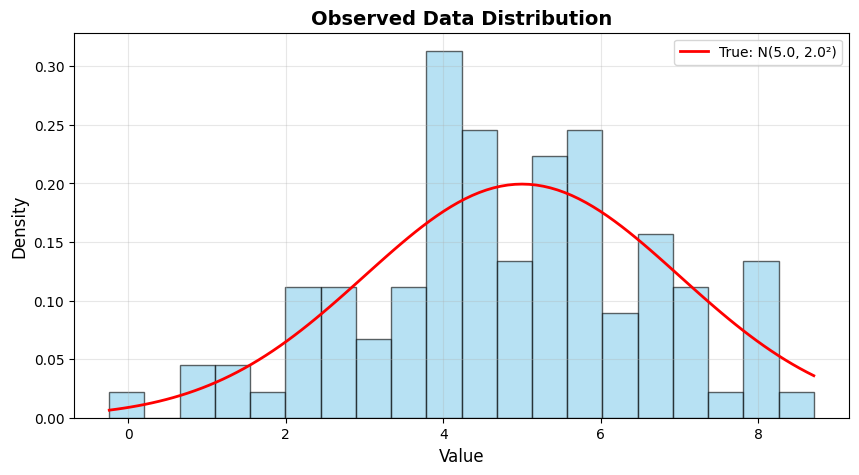

In [2]:
# Generate synthetic data
true_mu = 5.0
true_sigma = 2.0
n_obs = 100

observed_data = np.random.normal(true_mu, true_sigma, n_obs)

print(f"True parameters: μ={true_mu}, σ={true_sigma}")
print(f"Sample mean: {observed_data.mean():.3f}")
print(f"Sample std: {observed_data.std():.3f}")

# Plot data
plt.figure(figsize=(10, 5))
plt.hist(observed_data, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
x_range = np.linspace(observed_data.min(), observed_data.max(), 100)
plt.plot(x_range, stats.norm.pdf(x_range, true_mu, true_sigma), 
         'r-', linewidth=2, label=f'True: N({true_mu}, {true_sigma}²)')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Observed Data Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Define Log-Likelihood Function

In [3]:
def log_likelihood_normal(params, data):
    """
    Log-likelihood for Normal(μ, σ²) given data.
    
    Args:
        params: [μ, σ]
        data: observed data points
    """
    mu, sigma = params
    
    # Ensure sigma is positive
    if sigma <= 0:
        return -np.inf
    
    n = len(data)
    residuals = (data - mu) / sigma
    
    log_lik = -0.5 * n * np.log(2 * np.pi)
    log_lik -= n * np.log(sigma)
    log_lik -= 0.5 * np.sum(residuals**2)
    
    return log_lik

# Test the function
test_params = [5.0, 2.0]
print(f"Log-likelihood at true params: {log_likelihood_normal(test_params, observed_data):.2f}")

Log-likelihood at true params: -202.57


### Run MCMC Sampling

In [4]:
# MCMC parameters
initial_params = [0.0, 1.0]  # Start far from true values
param_bounds = [(-10, 10), (0.1, 10)]  # μ ∈ [-10, 10], σ ∈ [0.1, 10]
proposal_std = 0.3  # Proposal step sizes
n_samples = 20000
burn_in = 2000

print("Running MCMC sampling...")
samples = mcmc_sample(
    log_likelihood_fn=lambda params: log_likelihood_normal(params, observed_data),
    initial_params=initial_params,
    param_bounds=param_bounds,
    proposal_std=proposal_std,
    n_samples=n_samples,
    burn_in=burn_in
)

print(f"\nSamples generated successfully")
print(f"Generated {len(samples)} samples after burn-in")
print(f"\nPosterior estimates:")
print(f"μ: {samples[:, 0].mean():.3f} ± {samples[:, 0].std():.3f}")
print(f"σ: {samples[:, 1].mean():.3f} ± {samples[:, 1].std():.3f}")
print(f"\nTrue values: μ={true_mu}, σ={true_sigma}")

Running MCMC sampling...



Samples generated successfully
Generated 20000 samples after burn-in

Posterior estimates:
μ: 4.792 ± 0.187
σ: 1.840 ± 0.136

True values: μ=5.0, σ=2.0


## Visualize MCMC Results

### Trace Plots - Check Convergence

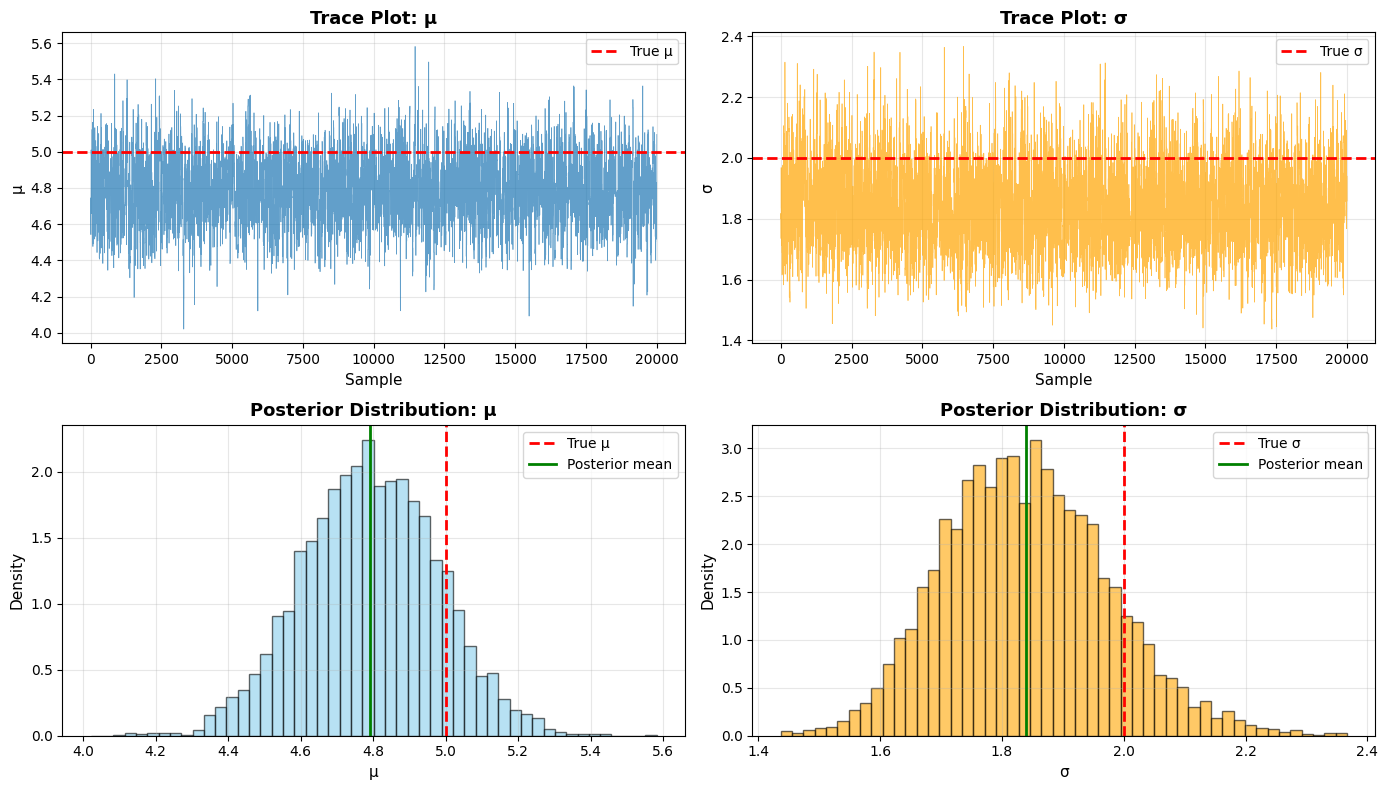

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Trace plots
axes[0, 0].plot(samples[:, 0], linewidth=0.5, alpha=0.7)
axes[0, 0].axhline(true_mu, color='red', linestyle='--', linewidth=2, label='True μ')
axes[0, 0].set_xlabel('Sample', fontsize=11)
axes[0, 0].set_ylabel('μ', fontsize=11)
axes[0, 0].set_title('Trace Plot: μ', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].plot(samples[:, 1], linewidth=0.5, alpha=0.7, color='orange')
axes[0, 1].axhline(true_sigma, color='red', linestyle='--', linewidth=2, label='True σ')
axes[0, 1].set_xlabel('Sample', fontsize=11)
axes[0, 1].set_ylabel('σ', fontsize=11)
axes[0, 1].set_title('Trace Plot: σ', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Posterior distributions
axes[1, 0].hist(samples[:, 0], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
axes[1, 0].axvline(true_mu, color='red', linestyle='--', linewidth=2, label='True μ')
axes[1, 0].axvline(samples[:, 0].mean(), color='green', linestyle='-', linewidth=2, label='Posterior mean')
axes[1, 0].set_xlabel('μ', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Posterior Distribution: μ', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].hist(samples[:, 1], bins=50, density=True, alpha=0.6, color='orange', edgecolor='black')
axes[1, 1].axvline(true_sigma, color='red', linestyle='--', linewidth=2, label='True σ')
axes[1, 1].axvline(samples[:, 1].mean(), color='green', linestyle='-', linewidth=2, label='Posterior mean')
axes[1, 1].set_xlabel('σ', fontsize=11)
axes[1, 1].set_ylabel('Density', fontsize=11)
axes[1, 1].set_title('Posterior Distribution: σ', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Joint Posterior Distribution

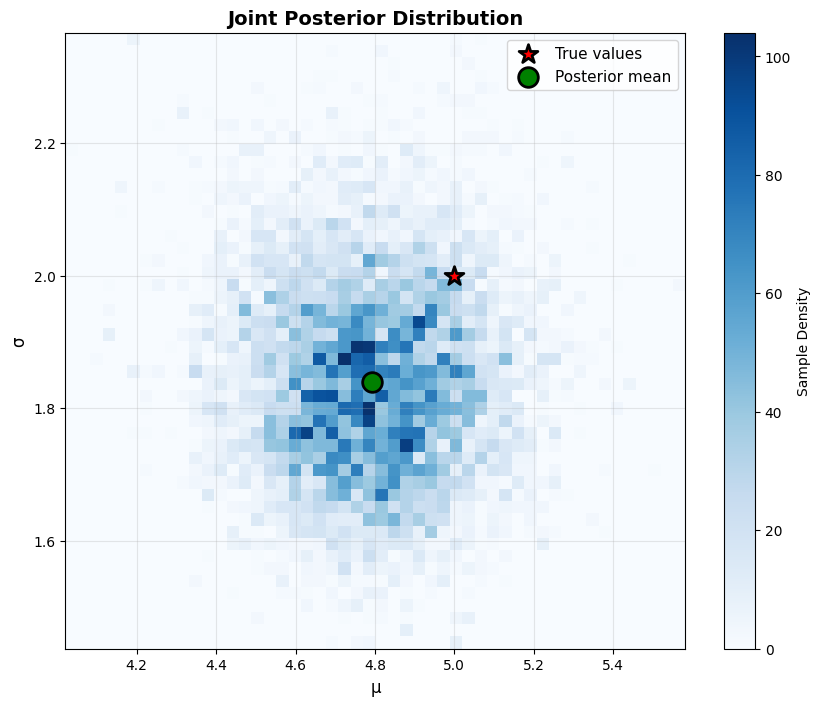

In [6]:
plt.figure(figsize=(10, 8))

# 2D histogram
plt.hist2d(samples[:, 0], samples[:, 1], bins=50, cmap='Blues')
plt.colorbar(label='Sample Density')

# Mark true values
plt.scatter([true_mu], [true_sigma], c='red', s=200, marker='*', 
           edgecolors='black', linewidths=2, label='True values', zorder=5)

# Mark posterior mean
plt.scatter([samples[:, 0].mean()], [samples[:, 1].mean()], 
           c='green', s=200, marker='o', edgecolors='black', 
           linewidths=2, label='Posterior mean', zorder=5)

plt.xlabel('μ', fontsize=12)
plt.ylabel('σ', fontsize=12)
plt.title('Joint Posterior Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.show()

## Example 2: Logistic Regression with MCMC

Bayesian inference for binary classification.

### Model
$$P(y=1 | \mathbf{x}, \boldsymbol{\beta}) = \frac{1}{1 + \exp(-\boldsymbol{\beta}^T \mathbf{x})}$$

### Log-Likelihood
$$\log L(\boldsymbol{\beta}) = \sum_{i=1}^n \left[y_i \log p_i + (1-y_i) \log(1-p_i)\right]$$

Features shape: (200, 3)
Class distribution: [100 100]


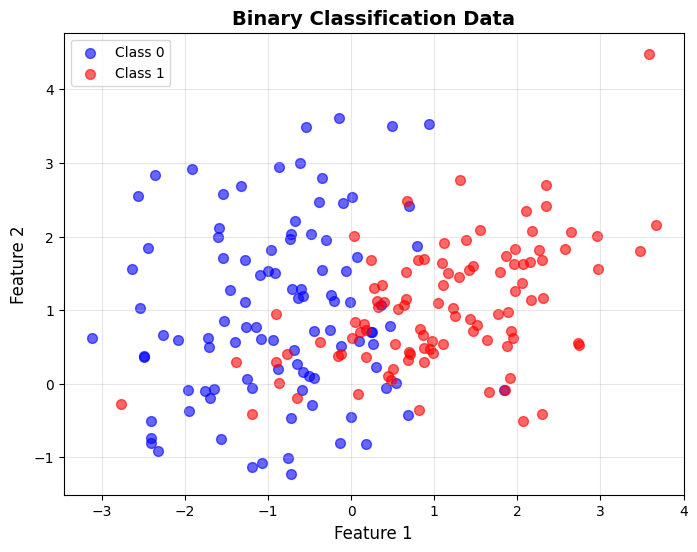

In [7]:
# Generate synthetic classification data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                          n_informative=2, random_state=42, n_clusters_per_class=1)

# Add intercept
X_with_intercept = np.column_stack([np.ones(len(X)), X])

print(f"Features shape: {X_with_intercept.shape}")
print(f"Class distribution: {np.bincount(y)}")

# Visualize data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', alpha=0.6, s=50)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', alpha=0.6, s=50)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Binary Classification Data', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [8]:
def log_likelihood_logistic(beta, X, y):
    """
    Log-likelihood for logistic regression.
    """
    z = X @ beta
    # Numerically stable sigmoid
    p = 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    p = np.clip(p, 1e-10, 1 - 1e-10)  # Avoid log(0)
    
    log_lik = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    
    # Add weak prior: beta ~ N(0, 10²)
    log_prior = -0.5 * np.sum(beta**2) / 100
    
    return log_lik + log_prior

# Prepare data tuple
logistic_data = (X_with_intercept, y)

# MCMC for logistic regression
initial_beta = np.zeros(3)  # [intercept, coef1, coef2]
beta_bounds = [(-10, 10)] * 3
beta_proposal_std = 0.1

print("Running MCMC for logistic regression...")
beta_samples = mcmc_sample(
    log_likelihood_fn=lambda params: log_likelihood_logistic(params, X_with_intercept, y),
    initial_params=initial_beta,
    param_bounds=beta_bounds,
    proposal_std=beta_proposal_std,
    n_samples=15000,
    burn_in=1500
)

print(f"\nPosterior estimates:")
print(f"β₀ (intercept): {beta_samples[:, 0].mean():.3f} ± {beta_samples[:, 0].std():.3f}")
print(f"β₁: {beta_samples[:, 1].mean():.3f} ± {beta_samples[:, 1].std():.3f}")
print(f"β₂: {beta_samples[:, 2].mean():.3f} ± {beta_samples[:, 2].std():.3f}")

Running MCMC for logistic regression...



Posterior estimates:
β₀ (intercept): 0.000 ± 0.000
β₁: 0.000 ± 0.000
β₂: 0.000 ± 0.000


### Visualize Decision Boundary with Uncertainty

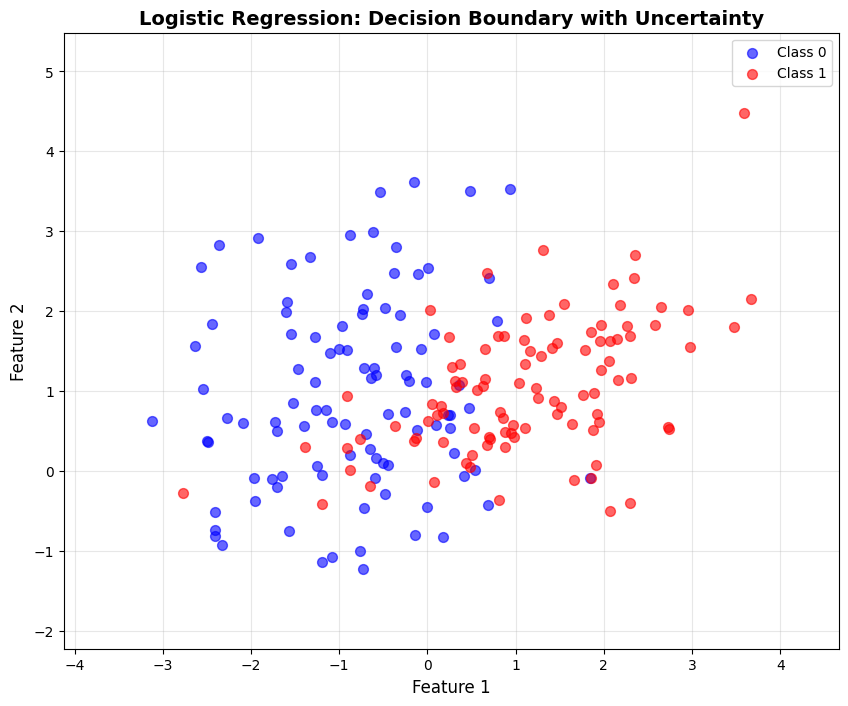

In [9]:
# Plot decision boundaries from posterior samples
plt.figure(figsize=(10, 8))

# Plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', alpha=0.6, s=50, zorder=3)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', alpha=0.6, s=50, zorder=3)

# Create grid
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot decision boundaries from random posterior samples
n_boundary_samples = 100
indices = np.random.choice(len(beta_samples), n_boundary_samples, replace=False)

for idx in indices:
    beta = beta_samples[idx]
    # Decision boundary: β₀ + β₁x₁ + β₂x₂ = 0
    # => x₂ = -(β₀ + β₁x₁) / β₂
    if abs(beta[2]) > 0.01:  # Avoid division by zero
        x1_line = np.array([x1_min, x1_max])
        x2_line = -(beta[0] + beta[1] * x1_line) / beta[2]
        plt.plot(x1_line, x2_line, 'gray', alpha=0.02, linewidth=0.5, zorder=1)

# Plot mean decision boundary
beta_mean = beta_samples.mean(axis=0)
if abs(beta_mean[2]) > 0.01:
    x1_line = np.array([x1_min, x1_max])
    x2_line = -(beta_mean[0] + beta_mean[1] * x1_line) / beta_mean[2]
    plt.plot(x1_line, x2_line, 'black', linewidth=3, label='Mean boundary', zorder=2)

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Logistic Regression: Decision Boundary with Uncertainty', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## MCMC Diagnostics

### Autocorrelation - Check Mixing

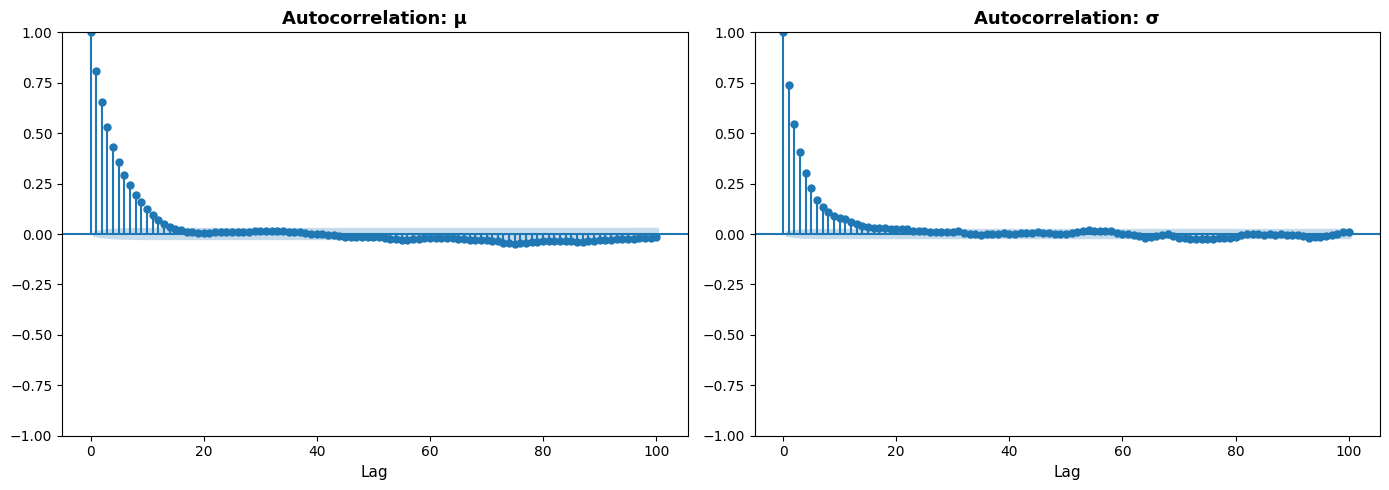

Low autocorrelation at large lags indicates good mixing!


In [10]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(samples[:, 0], lags=100, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation: μ', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Lag', fontsize=11)

plot_acf(samples[:, 1], lags=100, ax=axes[1], alpha=0.05)
axes[1].set_title('Autocorrelation: σ', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Lag', fontsize=11)

plt.tight_layout()
plt.show()

print("Low autocorrelation at large lags indicates good mixing!")

## Key Takeaways

1. **MCMC samples from complex distributions** using only likelihood evaluations
2. **Metropolis-Hastings** uses proposal distribution and accept/reject steps
3. **Burn-in period** allows chain to converge to target distribution
4. **Diagnostics** (trace plots, autocorrelation) verify convergence and mixing
5. **OptimizR provides 50-100x speedup** for likelihood evaluations
6. **Bayesian inference** naturally quantifies uncertainty in parameters

## Further Reading

- Gelman, A., et al. (2013). "Bayesian Data Analysis" - Chapter 11
- Brooks, S., et al. (2011). "Handbook of Markov Chain Monte Carlo"
- Betancourt, M. (2017). "A Conceptual Introduction to Hamiltonian Monte Carlo"